In [4]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data=pd.read_csv("Retail_Analytics_Dataset.csv")
df=pd.DataFrame(data)
print(df.head())



  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [5]:
# Basic information
print(df.info())
print()

print(df.isnull().sum())
print()

print(df.drop_duplicates())
print()

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print("✅ 'Order Date' column converted to datetime successfully!")
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')

# Drop rows where Order Date or Sales are missing
df = df.dropna(subset=['Order Date', 'Sales'])
print("Dataset shape after cleaning:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

     Order ID Customer Name 

In [28]:
# Descriptive summary for Sales
desc=df.describe()
print(desc)

mean=df['Sales'].mean()
median=df['Sales'].median()
std=df['Sales'].std()
mode=df['Sales'].mode()
print()
print("mean",mean)
print("median",median)
print("std",std)
print("mode",mode)


             Sales     Discount       Profit
count  4042.000000  4042.000000  4042.000000
mean   1497.649678     0.226455   371.860225
std     574.053006     0.074268   239.387373
min     500.000000     0.100000    26.850000
25%    1008.000000     0.160000   179.550000
50%    1494.500000     0.230000   319.635000
75%    1998.750000     0.290000   520.567500
max    2500.000000     0.350000  1120.950000

mean 1497.649678377041
median 1494.5
std 574.0530056017745
mode 0    1541
1    1559
2    1784
Name: Sales, dtype: int64


✅ 'Month' column created successfully!
  Order Date    Month
0 2017-11-08  2017-11
1 2017-11-08  2017-11
2 2017-06-12  2017-06
3 2016-10-11  2016-10
4 2016-10-11  2016-10
     Month   Sales
0  2015-01   30730
1  2015-02   38759
2  2015-03   79758
3  2015-04  110584
4  2015-05   66499


C:\Users\PRATIK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


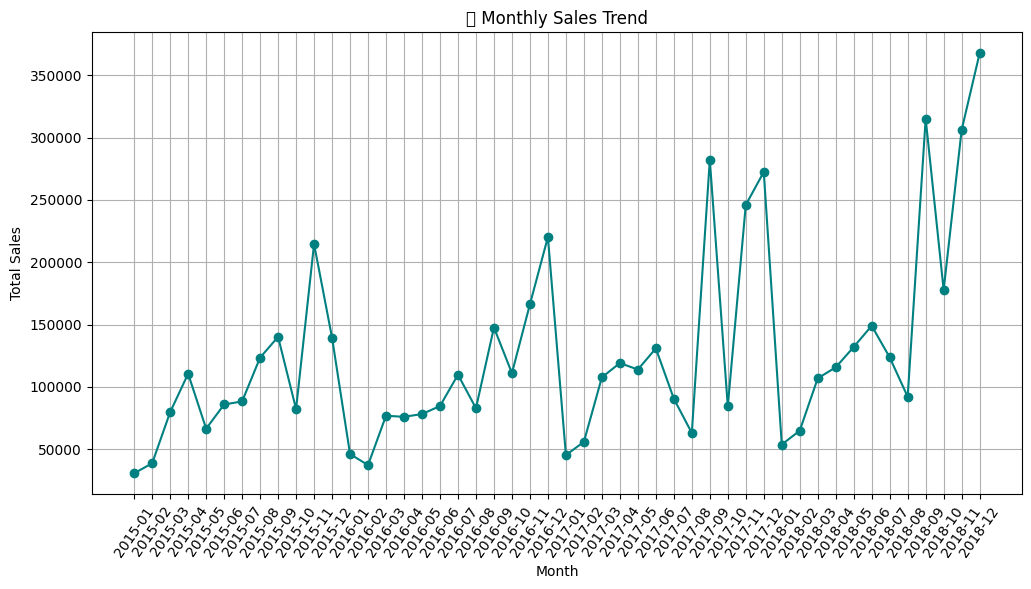

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Now safely extract the month period
df['Month'] = df['Order Date'].dt.to_period('M')

print("✅ 'Month' column created successfully!")
print(df[['Order Date', 'Month']].head())

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
print(monthly_sales.head())


# Convert 'Month' to string for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Line plot for monthly trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', color='teal')
plt.title('📈 Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=55)
plt.grid(True)
plt.show()

Customer Name
Amrish     157400
Verma      156248
Adavan     148837
Hussain    147228
Surya      142099
Arutra     141448
Shah       138827
Sudeep     136704
Jonas      133593
Komal      133173
Name: Sales, dtype: int64



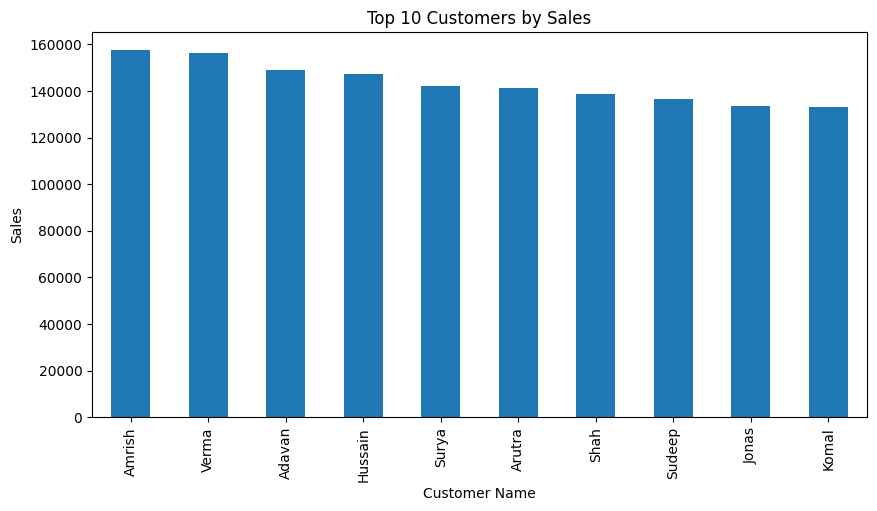

In [16]:
#Customer and Product Analysis

top_customers=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)
print()
top_customers.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Customers by Sales')
plt.ylabel('Sales')
plt.show()


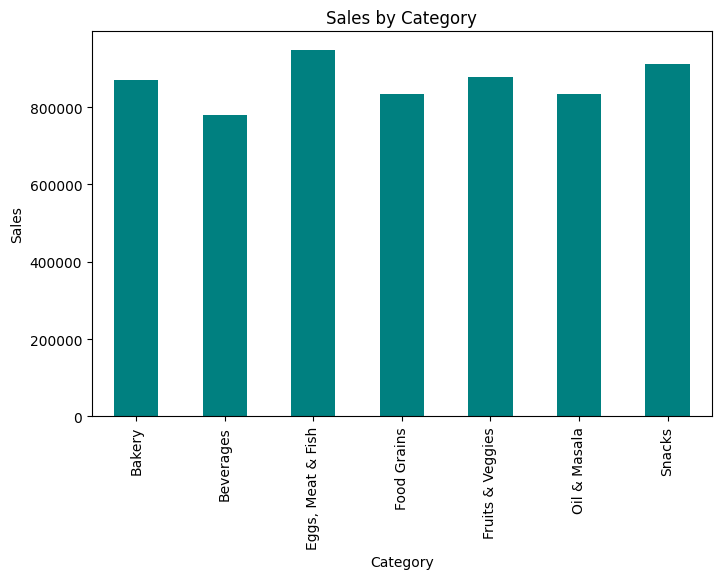

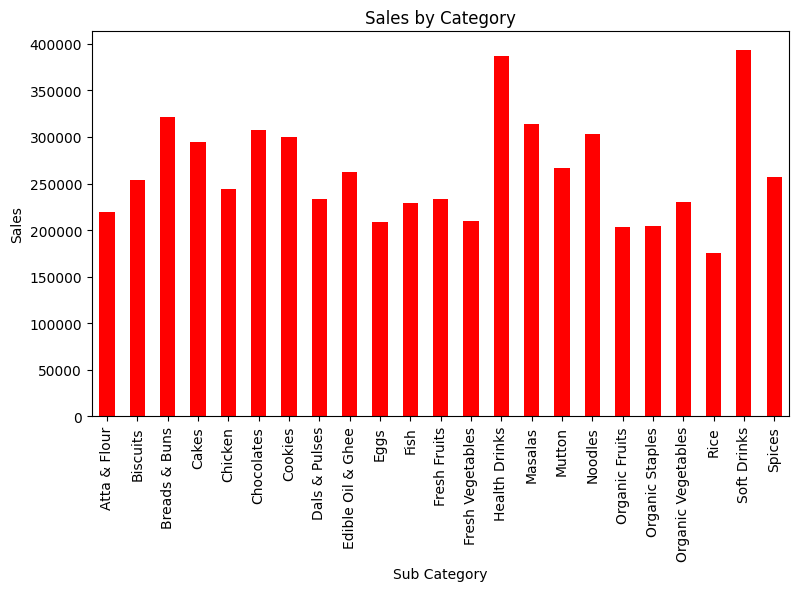

In [26]:
#Category and Subcategory Sales

catagery_sales=df.groupby('Category')['Sales'].sum()
subcatagery_sales=df.groupby('Sub Category')['Sales'].sum()

catagery_sales.plot(kind='bar', color='teal', figsize=(8,5))
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.show()

subcatagery_sales.plot(kind='bar', color='red', figsize=(9,5))
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.show()


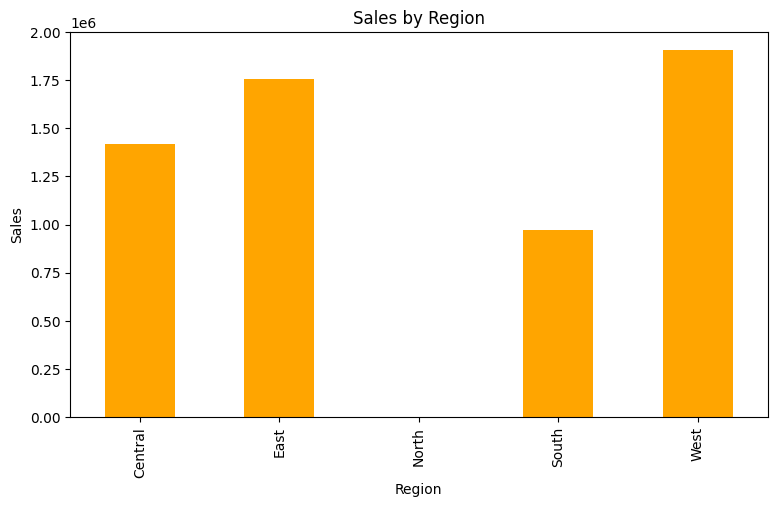

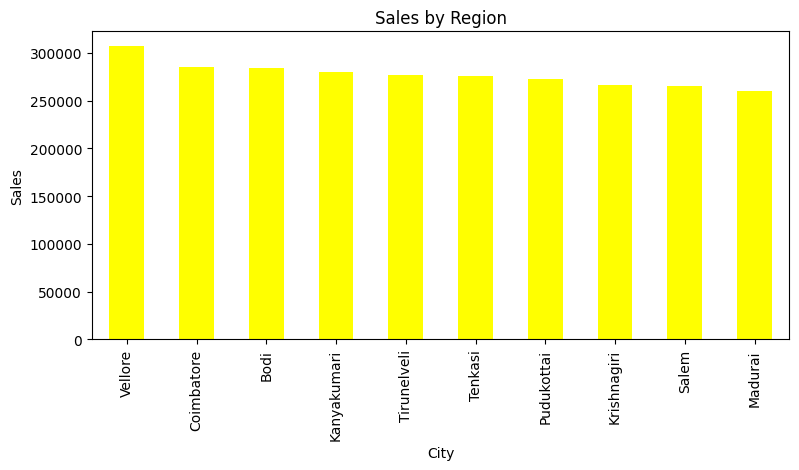

In [32]:
#Regional and City-wise Analysis
region_sales = df.groupby('Region')['Sales'].sum()
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Region sales
region_sales.plot(kind='bar', figsize=(9,5), color='orange')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()


# Region sales
city_sales.plot(kind='bar', figsize=(9,4), color='yellow')
plt.title('Sales by City')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Insights and Recommendations

#After analyzing:

#>Identify best-performing regions and categories

#>Detect seasonal trends (months with higher/lower sales)

#>Find top customers and products

#>Recommend:

#>Focus marketing on high-sales regions/customers

#>Improve inventory for top subcategories

#>Offer promotions during low-sales months